# Car Price Prediction 🚗🚙🚐

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
cars = pd.read_csv('../Data/QuikrCar.csv')

In [3]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


### Data is not Clean

1. **Year** consist of Irrelevant Data and Data Type is non Numeric
2. **Price** consist of Irrelevant Data and Data Type is non Numeric
3. **Kms Driven** consist of Irrelevant Data, Missing Data and Data Type is non Numeric
4. **Fuel Type** consist Missing Data
5. **Name** consist Inconsistent Data 

In [5]:
cars['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [6]:
cars['Price'].unique()[:10]

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000'],
      dtype=object)

In [7]:
cars['kms_driven'].unique()[:10]

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms'], dtype=object)

In [8]:
print(f'Missing Data \n{cars.isna().sum()}')

Missing Data 
name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64


### Data Cleaning

In [9]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [10]:
data = cars.copy()

Removing **Text Data** from Year Column

In [11]:
data = data[data['year'].str.isnumeric()]

In [12]:
data['year'] =  data['year'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


Removing **Text Data** from Price Column

In [14]:
data =  data[data['Price'] != 'Ask For Price']
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel


In [15]:
data['Price'] = data['Price'].str.replace(',','').astype(int)
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [17]:
data['kms_driven'].head()

0    45,000 kms
1        40 kms
3    28,000 kms
4    36,000 kms
6    41,000 kms
Name: kms_driven, dtype: object

In [18]:
data['kms_driven'] = data['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
data['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [19]:
data = data[data['kms_driven'].str.isnumeric()]

In [20]:
data['kms_driven'] = data['kms_driven'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [21]:
data = data[~data['fuel_type'].isna()]
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [22]:
data['name'] = data['name'].str.split(' ').str.slice(0,3).str.join(' ')
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


Only Keeping Indian Cars with High Resale Value

In [23]:
data = data[data['company'].map(data['company'].value_counts()) >50 ]

data['company'].value_counts()

Maruti      221
Hyundai     139
Mahindra     98
Tata         65
Honda        60
Name: company, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        583 non-null    object
 1   company     583 non-null    object
 2   year        583 non-null    int32 
 3   Price       583 non-null    int32 
 4   kms_driven  583 non-null    int32 
 5   fuel_type   583 non-null    object
dtypes: int32(3), object(3)
memory usage: 25.1+ KB


In [25]:
data['fuel_type'].value_counts()

Petrol    334
Diesel    247
LPG         2
Name: fuel_type, dtype: int64

In [26]:
data.describe()

,year,Price,kms_driven
count,583.000000,5.830000e+02,583.000000
mean,2012.415094,3.378180e+05,47133.667238
std,4.187928,4.048725e+05,36308.041149
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.600000e+05,27000.000000
50%,2013.000000,2.780000e+05,42000.000000
75%,2015.000000,4.249995e+05,57500.000000
max,2019.000000,8.500003e+06,400000.000000


In [27]:
data[data['Price'] > 6e6]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


It is an **Outlier** ( Price of Mahindra XUV 500 w6 cannot be 85 Lakhs )

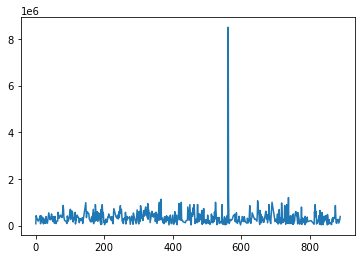

In [28]:
data['Price'].plot();

In [29]:
data = data[data['Price'] < 6e6]

In [30]:
data.reset_index(drop=True, inplace=True)
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
4,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
...,...,...,...,...,...,...
577,Maruti Suzuki Swift,Maruti,2009,250000,51000,Diesel
578,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
579,Tata Indica V2,Tata,2009,110000,30000,Diesel
580,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [31]:
data.columns = [x.title() for x in data.columns]
data.head()

,Name,Company,Year,Price,Kms_Driven,Fuel_Type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
4,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol


In [32]:
data.to_csv('../Data/Cars.csv', index=False)

In [33]:
car = pd.read_csv('../Data/Cars.csv')    
car.head()

,Name,Company,Year,Price,Kms_Driven,Fuel_Type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
4,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol


In [34]:
X = car.drop(columns='Price', axis=1)
y = car['Price']

Splitting the Data into Train and Test Set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=854)

In [36]:
ohe = OneHotEncoder()
ohe.fit(X[['Name','Company','Fuel_Type']])

OneHotEncoder()

In [37]:
print(f'Category Labels for Car Names : \n{ohe.categories_[0]}\n')
print(f'Category Labels for Company Names : \n{ohe.categories_[1]}\n')
print(f'Category Labels for Fuel Types : \n{ohe.categories_[2]}')

Category Labels for Car Names : 
['Honda Accord' 'Honda Amaze' 'Honda Amaze 1.2' 'Honda Amaze 1.5'
 'Honda Brio' 'Honda Brio V' 'Honda Brio VX' 'Honda City' 'Honda City 1.5'
 'Honda City SV' 'Honda City VX' 'Honda City ZX' 'Honda Jazz S'
 'Honda Jazz VX' 'Honda Mobilio' 'Honda Mobilio S' 'Honda WR V'
 'Hyundai Accent' 'Hyundai Accent Executive' 'Hyundai Accent GLE'
 'Hyundai Accent GLX' 'Hyundai Creta' 'Hyundai Creta 1.6'
 'Hyundai Elantra 1.8' 'Hyundai Elantra SX' 'Hyundai Elite i20'
 'Hyundai Eon' 'Hyundai Eon D' 'Hyundai Eon Era' 'Hyundai Eon Magna'
 'Hyundai Eon Sportz' 'Hyundai Fluidic Verna' 'Hyundai Getz'
 'Hyundai Getz GLE' 'Hyundai Getz Prime' 'Hyundai Grand i10'
 'Hyundai Santro' 'Hyundai Santro AE' 'Hyundai Santro Xing'
 'Hyundai Sonata Transform' 'Hyundai Verna' 'Hyundai Verna 1.4'
 'Hyundai Verna 1.6' 'Hyundai Verna Fluidic' 'Hyundai Verna Transform'
 'Hyundai Verna VGT' 'Hyundai Xcent Base' 'Hyundai Xcent SX' 'Hyundai i10'
 'Hyundai i10 Era' 'Hyundai i10 Magna' 'Hyundai i

In [38]:
ct = make_column_transformer(
    (OneHotEncoder(categories = ohe.categories_),['Name', 'Company', 'Fuel_Type']),
    remainder = 'passthrough'
)

In [39]:
pipe = make_pipeline(ct, LinearRegression())

In [40]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Honda Accord', 'Honda Amaze', 'Honda Amaze 1.2',
       'Honda Amaze 1.5', 'Honda Brio', 'Honda Brio V', 'Honda Brio VX',
       'Honda City', 'Honda City 1.5', 'Honda City SV', 'Honda City VX',
       'Honda City ZX', 'Honda Jazz S', 'Honda Jazz VX', 'Honda Mobilio...
       'Tata Sumo Grande', 'Tata Sumo Victa', 'Tata Tiago Revotorq',
       'Tata Tiago Revotron', 'Tata Tigor Revotron', 'Tata Venture EX',
       'Tata Vista Quadrajet', 'Tata Zest Quadrajet', 'Tata Zest XE',
       'Tata Zest XM'], dtype=object),
                                                                            array(['Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Tata'], dtype=object),
                                                                            array(

In [41]:
y_pred = pipe.predict(X_test)

In [42]:
print(f'R2 Score : {r2_score(y_test, y_pred)*100:.2f}%')

R2 Score : 83.20%


In [43]:
score = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    pipe = make_pipeline(ct, LinearRegression())
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score.append(r2_score(y_test,y_pred))

In [44]:
print(f'Score : {score[np.argmax(score)]*100:.2f}%')

Score : 83.20%


In [45]:
np.argmax(score)

854

In [46]:
import pickle
pickle.dump(pipe, open('../Data/LinearRegressionModel.pkl', 'wb'))

In [47]:
car.head(1)

,Name,Company,Year,Price,Kms_Driven,Fuel_Type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol


Test Prediction

In [48]:
swift = pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']], 
                          columns=['Name', 'Company','Year','Kms_Driven', 'Fuel_Type']))

In [49]:
print(f'Price of Maruti Suzuki Swift | Purchased : 2019 | Used : 100 Kms : | Price : {(round(swift[0],2))}₹')

Price of Maruti Suzuki Swift | Purchased : 2019 | Used : 100 Kms : | Price : 402695.36₹
